## Social Media Ad Campaign

In [1]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.simplefilter('ignore')

In [2]:
# Get the data
df = pd.read_csv("KAG_conversion_data.csv")
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [3]:
## Drop duplicates
df = df.drop_duplicates(keep= 'first')

## Check the shape 
df.shape

(1143, 11)

In [4]:
## Check the info 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1143 entries, 0 to 1142
Data columns (total 11 columns):
ad_id                  1143 non-null int64
xyz_campaign_id        1143 non-null int64
fb_campaign_id         1143 non-null int64
age                    1143 non-null object
gender                 1143 non-null object
interest               1143 non-null int64
Impressions            1143 non-null int64
Clicks                 1143 non-null int64
Spent                  1143 non-null float64
Total_Conversion       1143 non-null int64
Approved_Conversion    1143 non-null int64
dtypes: float64(1), int64(8), object(2)
memory usage: 107.2+ KB


In [5]:
## Find the unique values in a single column
print(df.age.unique())
print(df.gender.unique())

['30-34' '35-39' '40-44' '45-49']
['M' 'F']


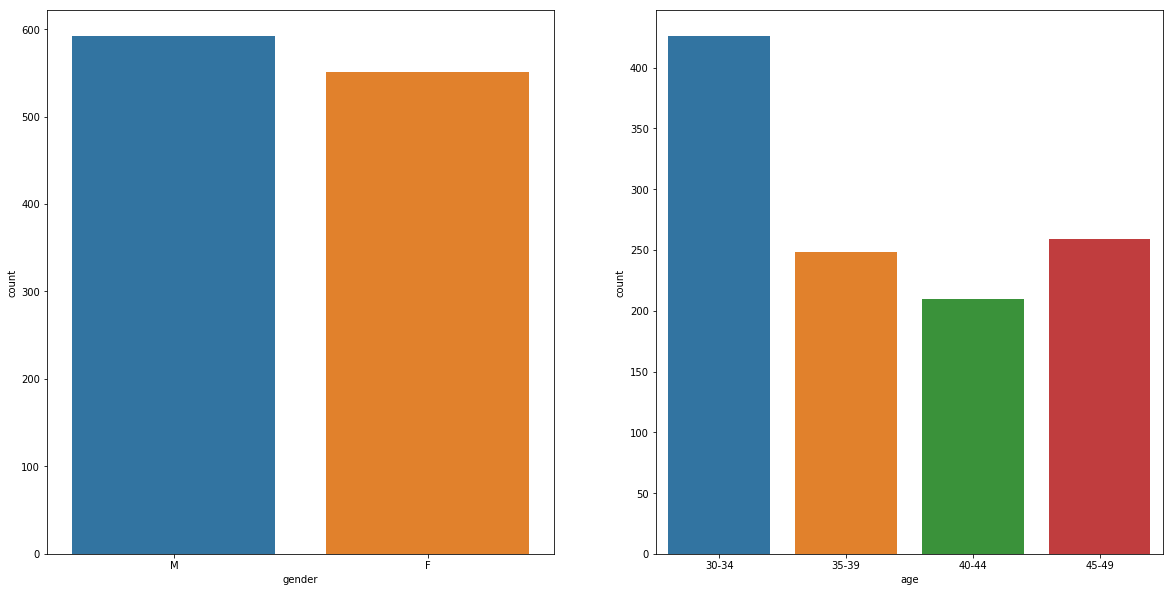

In [6]:
fig, ax = plt.subplots(1,2, figsize=(20,10))
sns.countplot(df.gender, ax=ax[0])
sns.countplot(df.age, ax=ax[1])
fig.show()


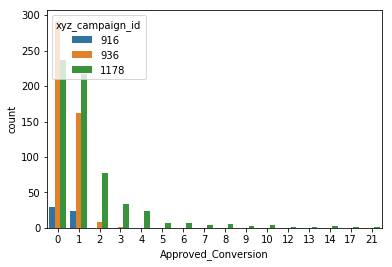

In [7]:
sns.countplot(df.Approved_Conversion, hue=df.xyz_campaign_id)

In [8]:
#Pre-Process Data

df['gender'] = np.where(df['gender']=='M',1,0)

df['Approved_Conversion'] = np.where(df['Approved_Conversion']> 0,1,0)

age = pd.get_dummies(df["age"], prefix='age')

df = pd.concat([df, age],axis=1)

df.drop(['age'], axis=1, inplace=True)

In [9]:
## Check the stats
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,age_30-34,age_35-39,age_40-44,age_45-49
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,0.517935,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.510936,0.372703,0.216973,0.183727,0.226597
std,1.939928e+05,121.629393,20500.308622,0.499897,26.952131,3.127622e+05,56.892438,86.908418,4.483593,0.500099,0.483736,0.412364,0.387431,0.418813
min,7.087460e+05,916.000000,103916.000000,0.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,0.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,1.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.121804e+06,1178.000000,144657.500000,1.000000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.314415e+06,1178.000000,179982.000000,1.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
## Find how many null values
df.isnull().sum()

ad_id                  0
xyz_campaign_id        0
fb_campaign_id         0
gender                 0
interest               0
Impressions            0
Clicks                 0
Spent                  0
Total_Conversion       0
Approved_Conversion    0
age_30-34              0
age_35-39              0
age_40-44              0
age_45-49              0
dtype: int64

In [11]:
## Find how many unique values
df.nunique()

ad_id                  1143
xyz_campaign_id           3
fb_campaign_id          691
gender                    2
interest                 40
Impressions            1130
Clicks                  183
Spent                   869
Total_Conversion         32
Approved_Conversion       2
age_30-34                 2
age_35-39                 2
age_40-44                 2
age_45-49                 2
dtype: int64

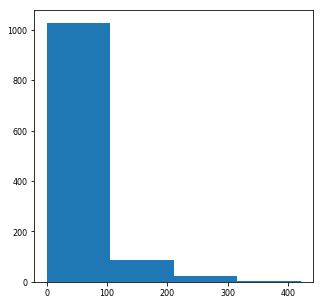

In [12]:
df['Clicks'].hist(figsize=(5, 5), bins=4, xlabelsize=8, ylabelsize=8, grid=False)

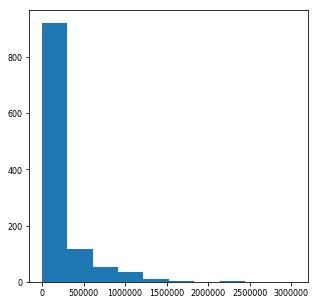

In [13]:
df['Impressions'].hist(figsize=(5, 5), bins=10, xlabelsize=8, ylabelsize=8, grid=False)

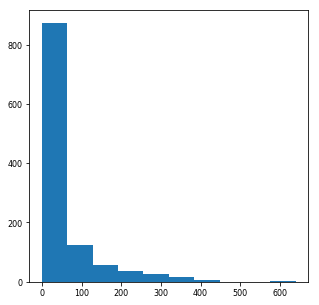

In [14]:
## Plot all the numerical variables at once
df['Spent'].hist(figsize=(5, 5), bins=10, xlabelsize=8, ylabelsize=8, grid=False)

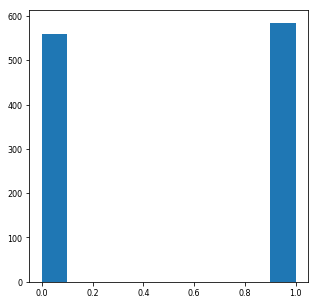

In [15]:
## Plot all the numerical variables at once
df['Approved_Conversion'].hist(figsize=(5, 5), bins=10, xlabelsize=8, ylabelsize=8, grid=False)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1143 entries, 0 to 1142
Data columns (total 14 columns):
ad_id                  1143 non-null int64
xyz_campaign_id        1143 non-null int64
fb_campaign_id         1143 non-null int64
gender                 1143 non-null int32
interest               1143 non-null int64
Impressions            1143 non-null int64
Clicks                 1143 non-null int64
Spent                  1143 non-null float64
Total_Conversion       1143 non-null int64
Approved_Conversion    1143 non-null int32
age_30-34              1143 non-null uint8
age_35-39              1143 non-null uint8
age_40-44              1143 non-null uint8
age_45-49              1143 non-null uint8
dtypes: float64(1), int32(2), int64(7), uint8(4)
memory usage: 133.8 KB


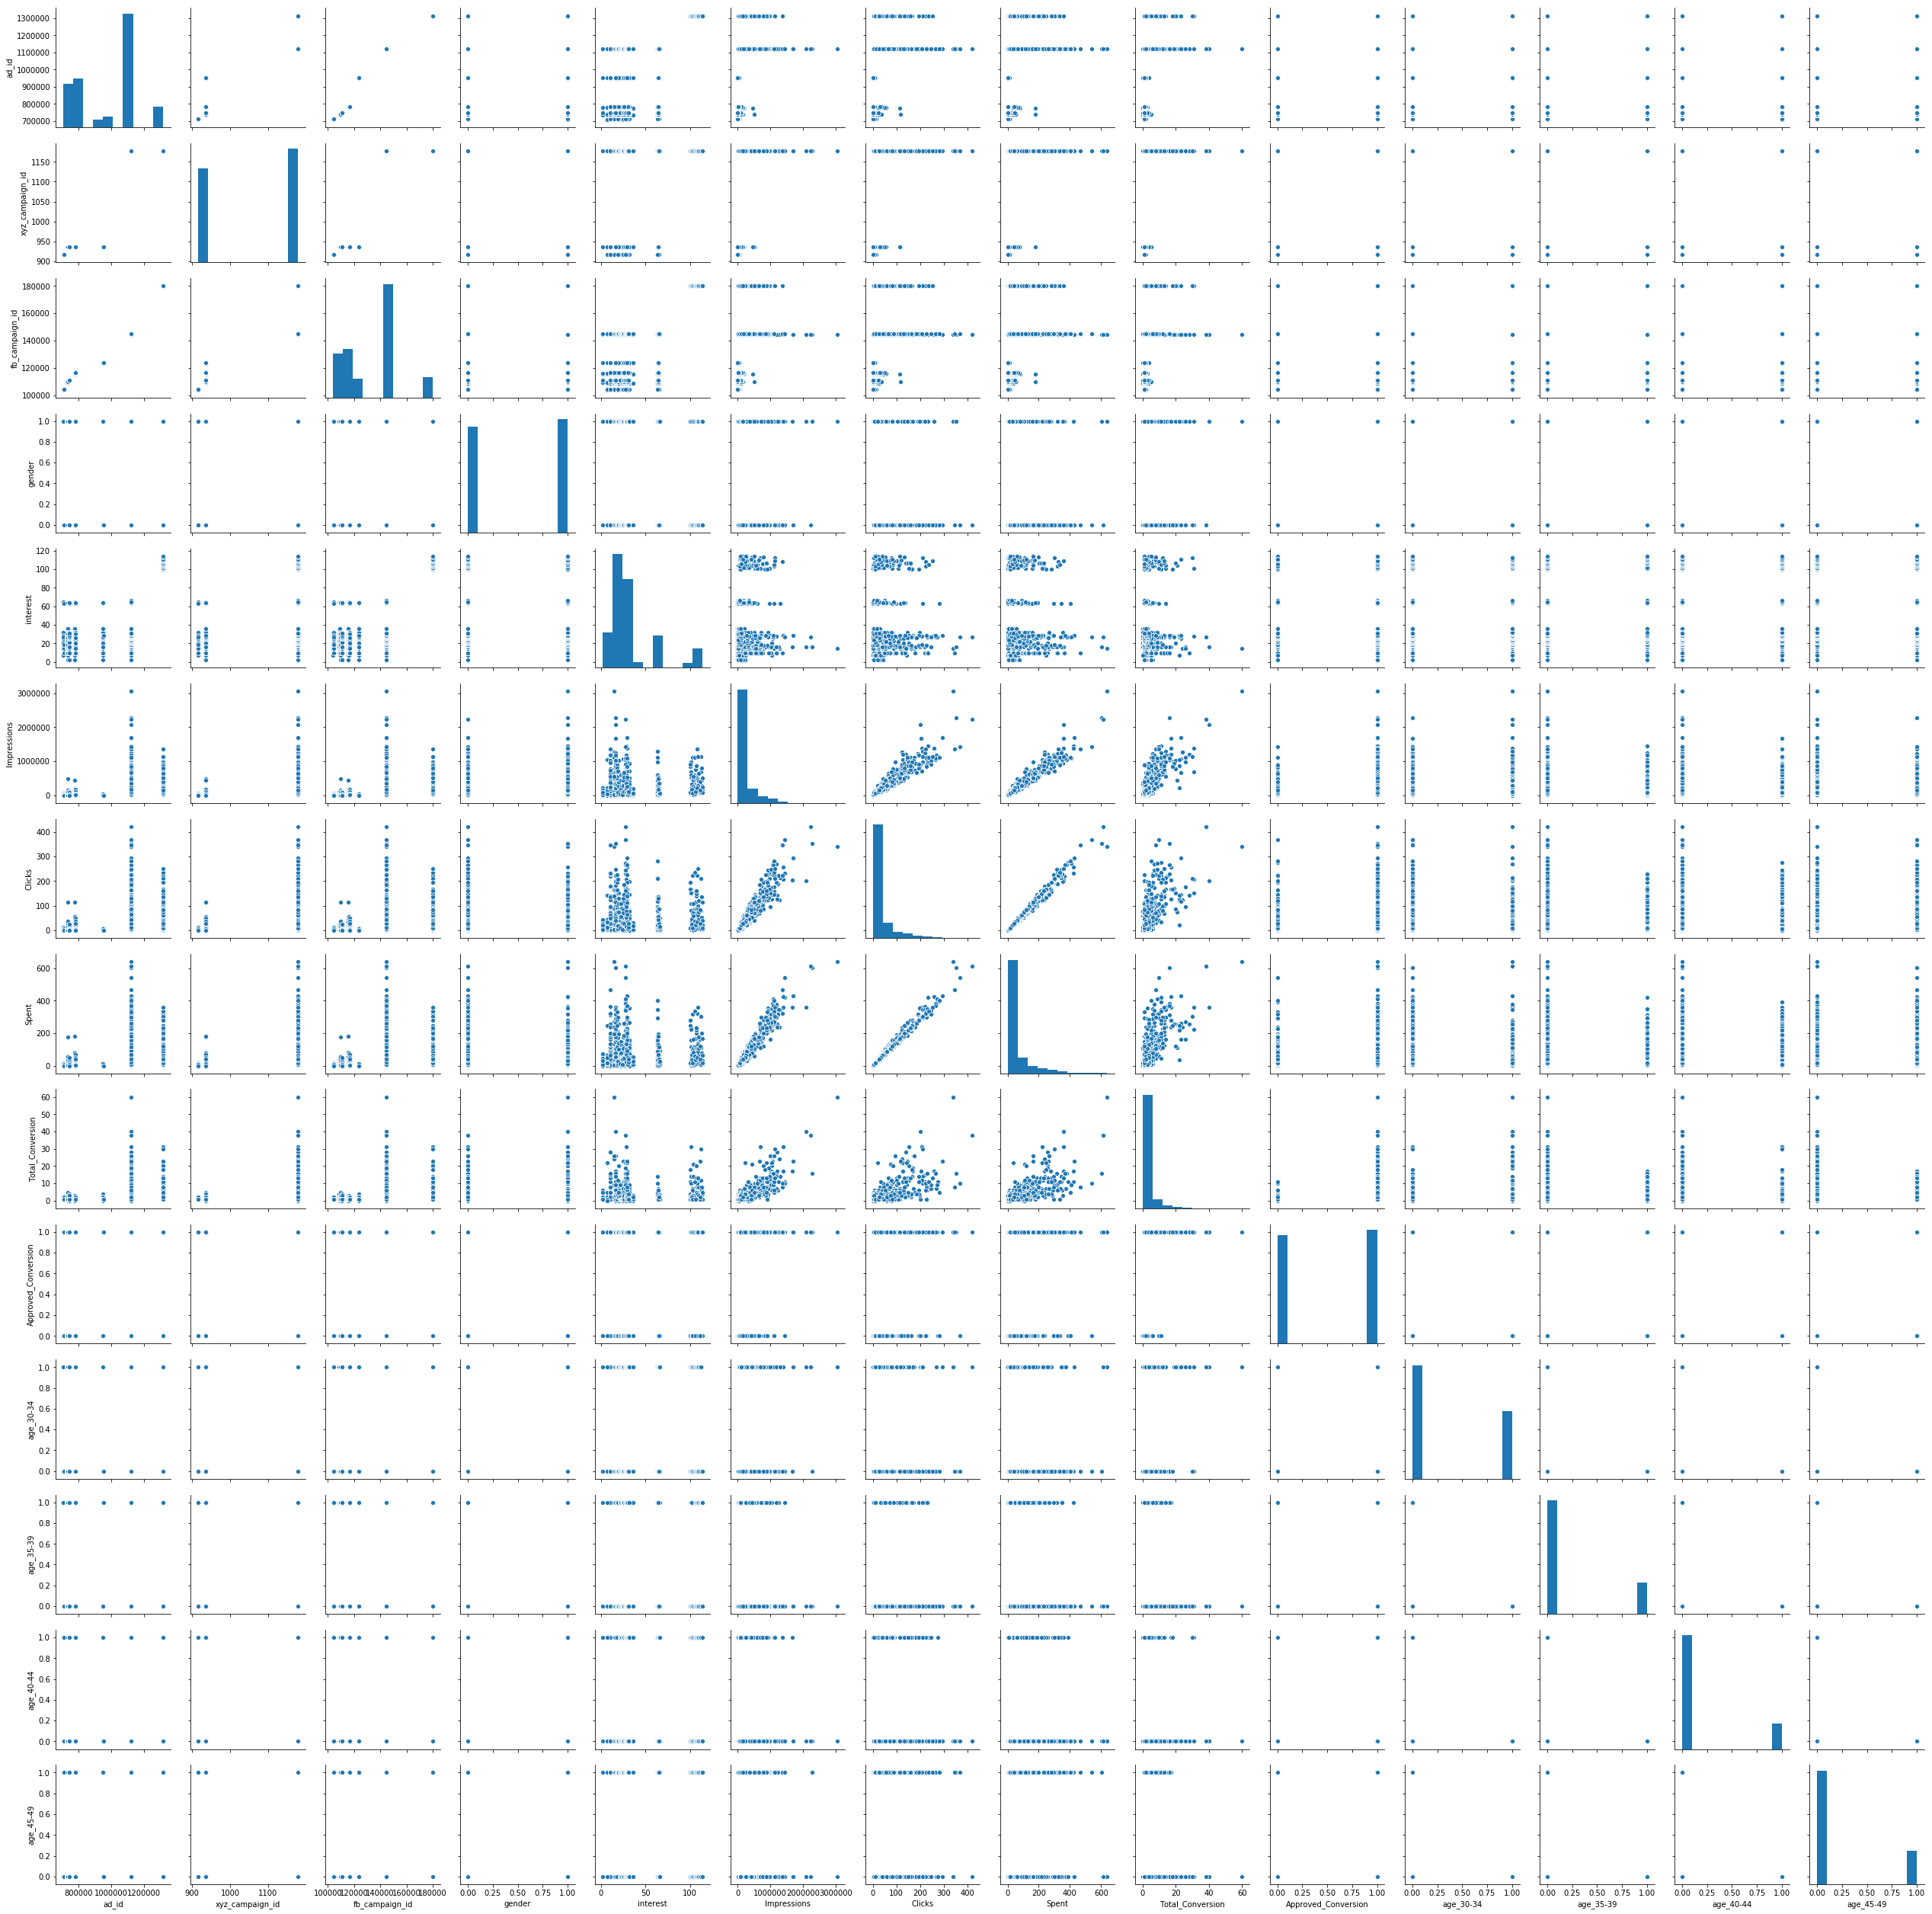

In [17]:
## Scatter plots with all numerical variables at once
sns.pairplot(df)
plt.show()

In [18]:
## See isolated correlation against target
#Isolate the correlation between Approved Conversion and other variables 

correlation = df.drop('Approved_Conversion', axis=1).apply(lambda x: x.corr(df.Approved_Conversion))
print(correlation.sort_values(ascending=False))

Total_Conversion    0.323085
Impressions         0.308116
Spent               0.281179
Clicks              0.271855
xyz_campaign_id     0.240249
ad_id               0.227901
fb_campaign_id      0.216063
interest            0.073569
gender              0.040371
age_30-34           0.030192
age_35-39           0.009715
age_40-44          -0.001340
age_45-49          -0.043198
dtype: float64


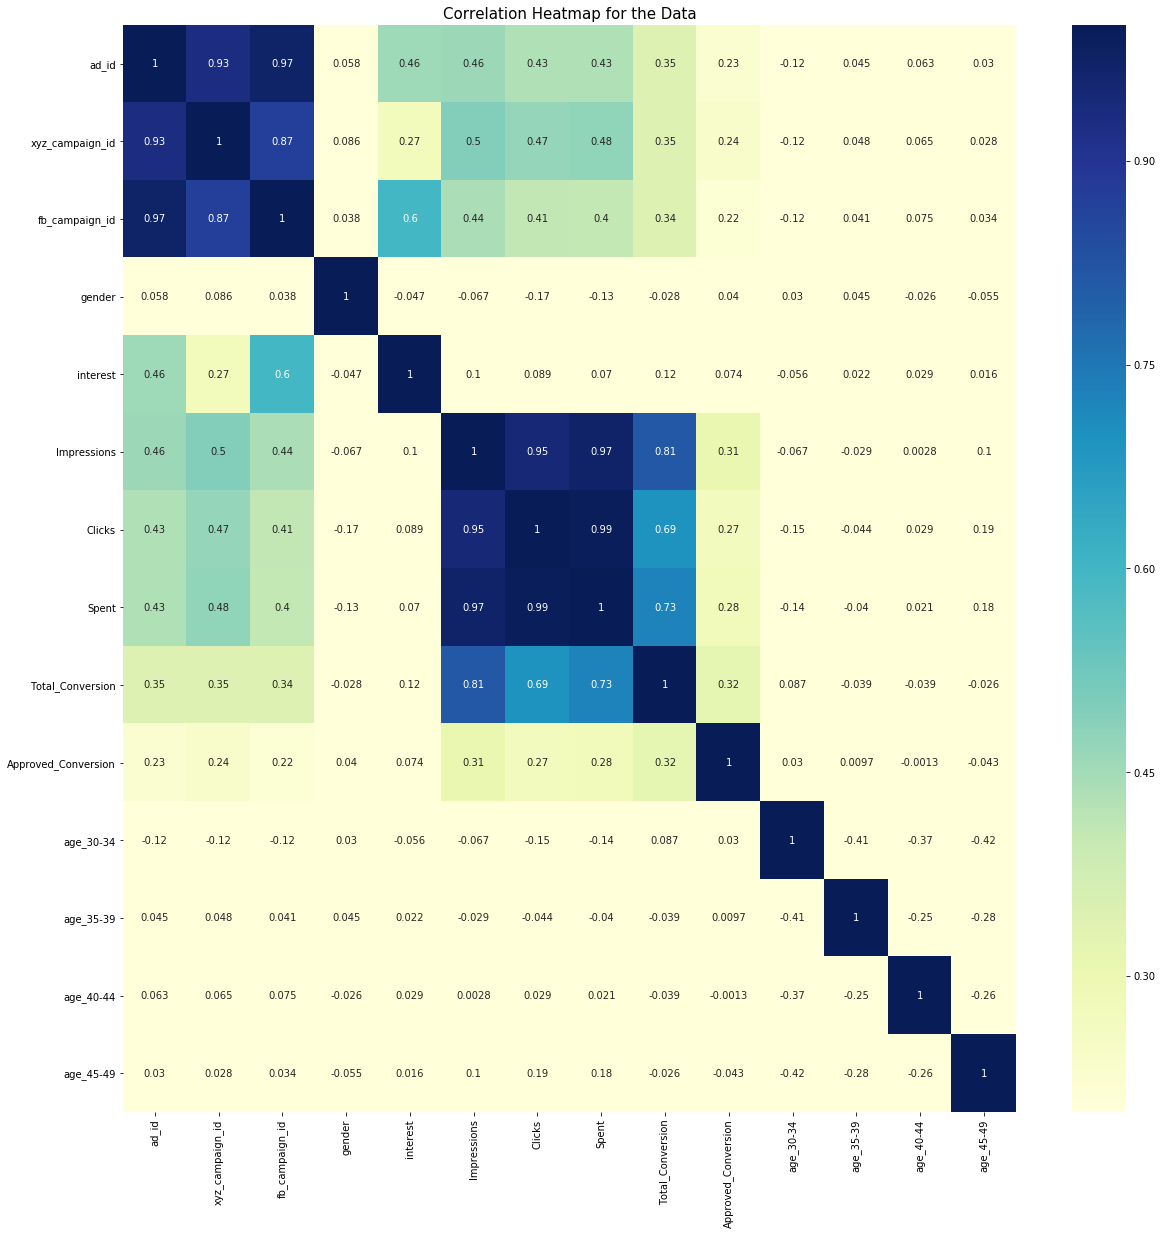

In [19]:
## Heat Map of correlations

fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True, ax=ax, vmin=.2)
plt.title('Correlation Heatmap for the Data', fontsize = 15)
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

y_train = train['Approved_Conversion']
y_test = test['Approved_Conversion']

X_train = train.drop(['Approved_Conversion'], axis=1)
X_test = test.drop(['Approved_Conversion'], axis=1)



In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection, tree, preprocessing, metrics, linear_model


def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv


# Random Forest Classifier ----------------------------------------------------------------

train_pred_log, acc_log, acc_cv_rfor = fit_ml_algo(RandomForestClassifier(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)

# Logistic Regression ---------------------------------------------------------------------

train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)


# K-Nearest Neighbours --------------------------------------------------------------------

train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)


# Gaussian Naive Bayes --------------------------------------------------------------------

train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)

# Linear SVC --------------------------------------------------------------------------------

train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)

# Stochastic Gradient Descent ----------------------------------------------------------------

train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X_train, 
                                                  y_train,
                                                  10)

# Decision Tree Classifier ------------------------------------------------------------------

train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)

# Gradient Boosting Trees -------------------------------------------------------------------

train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X_train, 
                                                                       y_train,
                                                                       10)

Text(0.5, 0, 'Importance')

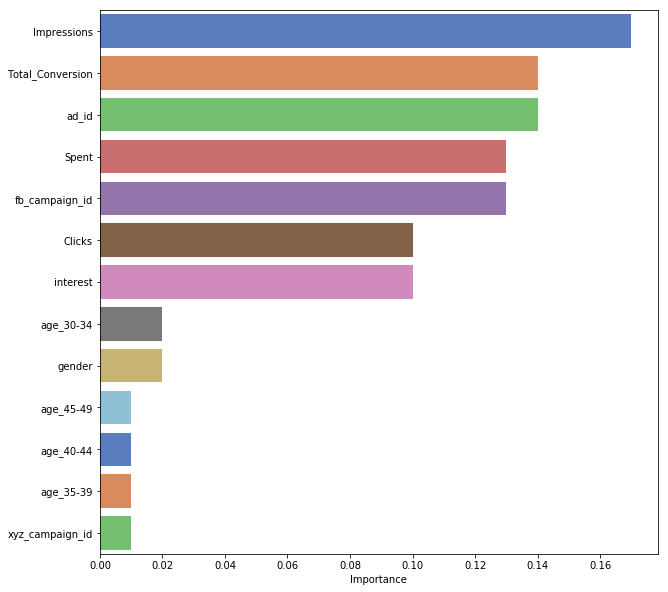

In [22]:
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
clf.fit(X_train, y_train)

f_im = clf.feature_importances_.round(2)
rank = pd.Series(f_im, index=X_train.columns).sort_values(ascending=False)

figsize = [10.0, 10.0]

plt.figure(figsize=figsize)
sns.barplot(y=rank.index,x=rank.values,palette='muted')
plt.xlabel('Importance')

In [23]:
models = pd.DataFrame({
    'Model': ['RandomForestClassifier', 'KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        acc_cv_rfor,
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt
    ]})
print("---Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Accuracy Scores---


,Model,Score
6,Decision Tree,100.00
7,Gradient Boosting Trees,82.49
1,KNN,71.66
0,RandomForestClassifier,65.54
2,Logistic Regression,65.54
3,Naive Bayes,62.58
5,Linear SVC,51.09
4,Stochastic Gradient Decent,50.11


In [24]:
# Cross-Validation Accuracy Scores ------------------------------------------------------------------

cv_models = pd.DataFrame({
    'Model': ['RandomForestClassifier', 'KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        acc_cv_rfor,
        acc_cv_knn, 
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
7,Gradient Boosting Trees,67.29
0,RandomForestClassifier,65.54
2,Logistic Regression,65.32
6,Decision Tree,63.46
3,Naive Bayes,62.58
1,KNN,58.86
4,Stochastic Gradient Decent,55.25
5,Linear SVC,52.41


In [25]:
#Choose model


X_train = np.array(X_train[['Impressions', 'Spent', 'interest', 'Clicks']])

y_train = np.array(y_train)

gbc = GradientBoostingClassifier()
model = gbc.fit(X_train, y_train)

print("The accuracy score is: ", round(model.score(X_train, y_train) * 100, 2))



The accuracy score is:  79.43


### - Impressions: the number of times the ad was shown.

### - Spent: Amount paid by company xyz to Facebook, to show that ad.

### - Interest: a code specifying the category to which the person’s interest belongs
(interests are as mentioned in the person’s Facebook public profile).

### - Clicks: number of clicks on for that ad.

In [26]:
print("Number of impressions: ", df.Impressions.min(),"-",df.Impressions.max())
print("Amount of spend is: ", df.Spent.min(),"-",df.Spent.max())
print("Amount of interest is: ", df.interest.min(),"-",df.interest.max())
print("Number of clicks is: ", df.Clicks.min(),"-",df.Clicks.max())

Number of impressions:  87 - 3052003
Amount of spend is:  0.0 - 639.9499981
Amount of interest is:  2 - 114
Number of clicks is:  0 - 421


In [27]:
## function to predict sales conversion

def sales_conversion(Impressions, Spent, interest, Clicks):
    if(model.predict([[Impressions, Spent, interest, Clicks]]))==0:
        print('Sales conversion not likely')
    else:
        print('Sales conversion will be likely')

#Predict test
sales_conversion(300, 200, 700, 2)

Sales conversion not likely
